# Primeiro trabalho de Aprendizado de Máquina

In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

## Apresentação dos dados

In [84]:
# Import das bibliotecas necessárias para rodar o programa
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score,roc_curve

In [85]:
# Lendo os dados do Dataset
dados = pd.read_csv('weatherAUS.csv')
print(dados.shape)

(142193, 24)


In [86]:
# Visualizando as primeiras 5 instâncias do Dataset
dados.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [87]:
# Analisando mais detalhadamente cada coluna do Dataset
dados.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [88]:
# Verificando o tipo dos dados presentes na tabela
dados.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

## Pré-processamento

In [89]:
# Descobrindo se há dados faltantes, caso seja True pode-se afirmar que existem dados faltantes na respectiva coluna
dados.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

In [90]:
# Colocando as colunas com dados faltantes em uma lista para serem tratadas futuramente. Nessa lista são colocadas
# apenas as colunas com dados numéricos
colunas_dados_faltantes = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', \
                           'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', \
                           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', \
                           'Cloud3pm', 'Temp9am', 'Temp3pm']

# Substituindo valores numéricos com a média dos valores não nulos presentes na coluna
for coluna in colunas_dados_faltantes:
    dados[coluna] = dados[coluna].fillna(dados[coluna].mean())
    
# Colocando as colunas com dados faltantes em uma lista. Nessa lista são colocadas as colunas com dados categóricos
colunas_dados_categoricos = ['WindGustDir', 'WindDir3pm', 'WindDir9am']

# Substituindo valores categóricos pela moda dos valores não nulos presentes na coluna
for coluna in colunas_dados_categoricos:
    dados[coluna] = dados[coluna].fillna(dados[coluna].mode()[0])

# Verificando se ainda existem dados faltantes no Dataset
dados.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

In [91]:
# Substituindo os valores de objeto dos atributos 'RainToday' pra 0 e 1 (antes eram "Yes" e "No")
# e substituindo valores faltantes por 0
dados['RainToday'] = dados['RainToday'].replace({'No': 0, 'Yes': 1}).fillna(0)

In [92]:
# Substituindo No e Yes por 0 e 1 para o atributo alvo
dados['RainTomorrow'] = dados['RainTomorrow'].replace({'No': 0, 'Yes': 1})

In [93]:
# Verificando quantas cidades existem no Dataset
len(set(dados['Location']))

49

In [94]:
# Escolhemos LabelEncoder porque há 49 localizações diferentes e, portanto, 
# seriam necessários mais 49 atributos utilizando One-HotEncoder

from sklearn import preprocessing

colunas_dados_categoricos.append('Location')

for coluna in colunas_dados_categoricos:
    le = preprocessing.LabelEncoder()
    le.fit(dados[coluna])
    dados[coluna] = le.transform(dados[coluna])

In [95]:
# Visualizando as primeiras 5 instâncias do Dataset, para analisar as mudanças feitas
dados.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0.0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0.0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0.0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,1.0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0


In [96]:
# Novamente analisando mais detalhadamente cada coluna do Dataset, agora sem os dados faltantes
dados.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,7.788485,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,2.360682,0.224181
std,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,4.546322,...,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.415065,8.477969,0.417043
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,4.000000,...,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,0.000000
50%,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,8.000000,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,12.000000,...,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.800000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,15.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


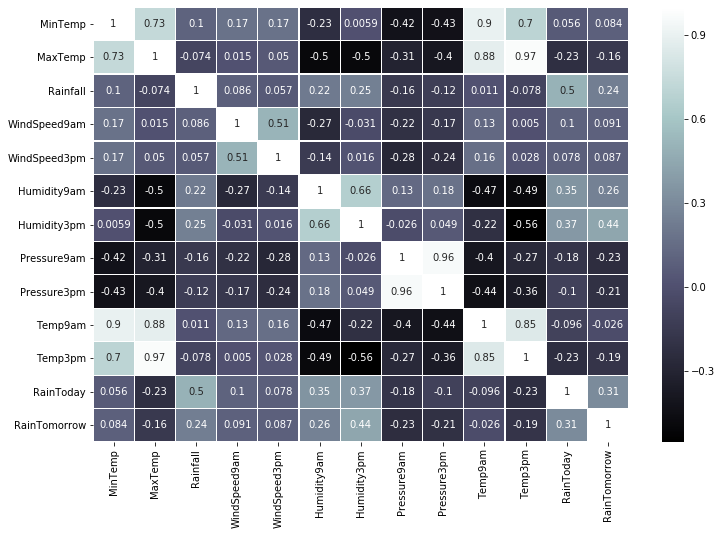

In [97]:
# Analisando a correlação dos dados do Dataset
# Para isso, plotamos a matriz de correlação entre os valores numéricos

rain_data_num = dados[['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm',
                           'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
                           'Temp9am','Temp3pm','RainToday','RainTomorrow']]
plt.figure(figsize=(12,8))
sns.heatmap(rain_data_num.corr(),annot=True,cmap='bone',linewidths=0.25)

Percebe-se que a coluna `Temp9am` se correlaciona com algumas outras.

Assim, é interessante desconsiderá-la.

In [98]:
# Desconsiderando a coluna Temp9am
dados = dados.drop(columns=['Temp9am'])

In [99]:
# Desconsiderando a coluna: RISK_MM
# Note: You should exclude the variable Risk-MM when training a binary classification model. 
# Not excluding it will leak the answers to your model and reduce its predictability.
dados = dados.drop(columns=['RISK_MM'])

## Gráficos

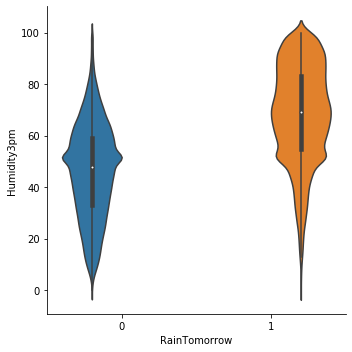

In [100]:
#Plotando gráficos relacionandos à coluna Humidity3pm com RainTomorrow para analisar como os dados da humidade 
# do ar as 3pm se relacionam com a probabilidade de chover amanhã.

sns.catplot(x='RainTomorrow', y='Humidity3pm', hue='RainTomorrow',
            kind="violin", split=False, data=dados);

Assim, pode-se perceber que, quando a humidade tem valores entre 60 e 80, há uma maior chance de chover amanhã, 
representada pelo gráfico laranja. Já a parte mais significativa dos dados que mortram que não vai chover 
amanhã se encontra entre 40 e 60.

## Classificação

In [101]:
# Divisão dos dados para treinamento e teste
Y = dados.pop('RainTomorrow').values
X = dados.drop(columns=['Date']).values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

print(x_train.shape)
print(x_test.shape)

(113754, 20)
(28439, 20)


In [102]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_train, y_train)
Score_1=modelo.score(x_test, y_test)

# Cálculo de Acurácia
print('Acurácia do modelo Naive-Bayes utilizando holdout de 20%%: %.4f%%' % (Score_1*100))

score_3 = cross_val_score(modelo, x_test, y_test, cv=10)
print('Acurácia do modelo Naive Bayes utilizando 10-fold: %.4f%%' % (score_3.mean()*100))

Acurácia do modelo Naive-Bayes utilizando holdout de 20%: 79.9219%
Acurácia do modelo Naive Bayes utilizando 10-fold: 79.9501%


[[18975  3123]
 [ 2587  3754]]


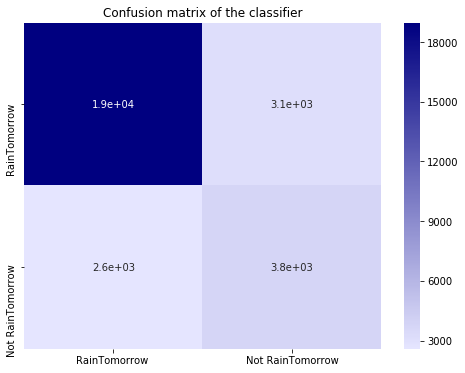

In [103]:
# Matriz de Confusão (Naive Bayes)
targetnames = ['RainTomorrow ','Not RainTomorrow']

y_pred = modelo.predict(x_test)
confusion_matrix= sklearn.metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in targetnames], columns = [i for i in targetnames])
print(confusion_matrix)

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure(figsize=(8, 6))
plt.title('Confusion matrix of the classifier')
sns.heatmap(df_cm, annot=True, cmap=cmap)

In [104]:
# Algoritmo de Classificação Árvore de Decisão

modelo_2 = DecisionTreeClassifier(criterion='entropy')
modelo_2.fit(x_train, y_train)

modelo_2_Score_1=modelo_2.score(x_test, y_test)
print('Acurácia do modelo Decision Tree utilizando holdout de 20%%: %.4f%%' % (modelo_2_Score_1*100))
print(modelo_2_Score_1)

modelo_2_score_2 = cross_val_score(modelo_2, x_test, y_test, cv=10)
print('Acurácia do modelo Decision Tree utilizando cross validation 10-fold: %.4f%%' % (modelo_2_score_2.mean()*100))


Acurácia do modelo Decision Tree utilizando holdout de 20%: 79.0675%
0.7906747775941488
Acurácia do modelo Decision Tree utilizando cross validation 10-fold: 78.0935%


In [105]:
# Plotando a Árvore de Decisão

feature_names = ['Date','Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir',
                 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am',
                 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp3pm']
target_names = ['Rain', 'Not Rain']

export_graphviz(modelo_2, out_file='tree.dot', feature_names=feature_names, 
                class_names=target_names, filled=True, rounded=True,special_characters=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=200'])

from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

[[19059  3039]
 [ 2914  3427]]


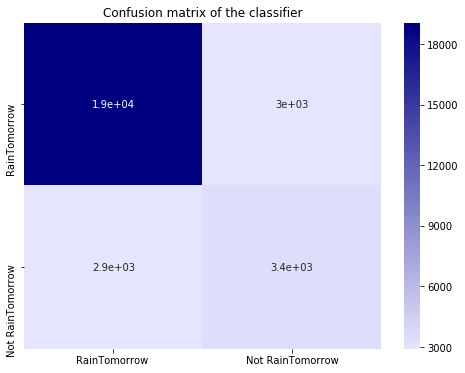

In [106]:
# Matriz de Confusão (Decision Tree)

targetnames = ['RainTomorrow ','Not RainTomorrow']

y_pred_2 = modelo_2.predict(x_test)
confusion_matrix= sklearn.metrics.confusion_matrix(y_test, y_pred_2)

print(confusion_matrix)

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in targetnames], columns = [i for i in targetnames])
cmap = sns.light_palette("navy", as_cmap=True)

plt.figure(figsize=(8, 6))
plt.title('Confusion matrix of the classifier')
sns.heatmap(df_cm, annot=True, cmap=cmap)